In [0]:
import tensorflow as tf
import numpy as np
import timeit
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.preprocessing import MinMaxScaler

In [0]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

nb_classes = 10
training_epochs = 15
batch_size = 100

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

with tf.device('/device:GPU:0'):
  gpu_hypothesis = tf.nn.softmax(tf.matmul(x, W) + b)
  gpu_cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(gpu_hypothesis), axis=1))
  gpu_optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(gpu_cost)

  gpu_is_correct = tf.equal(tf.argmax(gpu_hypothesis, 1), tf.argmax(y, 1))
  gpu_accuracy = tf.reduce_mean(tf.cast(gpu_is_correct, tf.float32))
  
with tf.device('/device:CPU:0'):
  cpu_hypothesis = tf.nn.softmax(tf.matmul(x, W) + b)
  cpu_cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(cpu_hypothesis), axis=1))
  cpu_optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(cpu_cost)

  cpu_is_correct = tf.equal(tf.argmax(cpu_hypothesis, 1), tf.argmax(y, 1))
  cpu_accuracy = tf.reduce_mean(tf.cast(cpu_is_correct, tf.float32))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
tf.test.gpu_device_name()

def cpu():
  sess.run(tf.global_variables_initializer())
    
  for epoch in range(training_epochs):
      avg_cost = 0
      total_batch = int(mnist.train.num_examples / batch_size)
      
      for batch in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        cost_val, _ = sess.run([cpu_cost, cpu_optimizer], feed_dict = {x:batch_xs, y:batch_ys})
        avg_cost += cost_val / total_batch
      
      print("CPU\n Epoch: {:04d}\tCost: {:.9f}".format(epoch+1, avg_cost))
  print("Accuracy: ", cpu_accuracy.eval(session=sess, feed_dict={x:mnist.test.images, y:mnist.test.labels}))

def gpu():
  sess.run(tf.global_variables_initializer())
    
  for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
      
    for batch in range(total_batch):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      cost_val, _ = sess.run([gpu_cost, gpu_optimizer], feed_dict = {x:batch_xs, y:batch_ys})
      avg_cost += cost_val / total_batch
      
    print("GPU\n Epoch: {:04d}\tCost: {:.9f}".format(epoch+1, avg_cost))
  print("Accuracy: ", gpu_accuracy.eval(session=sess, feed_dict={x:mnist.test.images, y:mnist.test.labels}))

In [0]:
with tf.Session() as sess:
  cpu_time = timeit.timeit('cpu()', number=1, setup='from __main__ import cpu')
  gpu_time = timeit.timeit('gpu()', number=1, setup='from __main__ import gpu')
  
  print("Comparing time taken by CPU & GPU")
  print('CPU Time: {}'.format(cpu_time))
  print('GPU Time: {}'.format(gpu_time))

CPU
 Epoch: 0001	Cost: 2.766041253
CPU
 Epoch: 0002	Cost: 1.098861806
CPU
 Epoch: 0003	Cost: 0.884717470
CPU
 Epoch: 0004	Cost: 0.788414462
CPU
 Epoch: 0005	Cost: 0.718213546
CPU
 Epoch: 0006	Cost: 0.657723588
CPU
 Epoch: 0007	Cost: 0.624297614
CPU
 Epoch: 0008	Cost: 0.602385257
CPU
 Epoch: 0009	Cost: 0.565875775
CPU
 Epoch: 0010	Cost: 0.542583429
CPU
 Epoch: 0011	Cost: 0.538814830
CPU
 Epoch: 0012	Cost: 0.517082698
CPU
 Epoch: 0013	Cost: 0.500772326
CPU
 Epoch: 0014	Cost: 0.494767287
CPU
 Epoch: 0015	Cost: 0.478726737
Accuracy:  0.8906
GPU
 Epoch: 0001	Cost: 2.793434142
GPU
 Epoch: 0002	Cost: 1.129907167
GPU
 Epoch: 0003	Cost: 0.909383888
GPU
 Epoch: 0004	Cost: 0.776077957
GPU
 Epoch: 0005	Cost: 0.722254557
GPU
 Epoch: 0006	Cost: 0.656303687


KeyboardInterrupt: ignored

In [0]:
pip install matplotlib

GPU
 Epoch: 0001	Cost: 2.889445407
GPU
 Epoch: 0002	Cost: 1.043976010
GPU
 Epoch: 0003	Cost: 0.827521809
GPU
 Epoch: 0004	Cost: 0.727123654
GPU
 Epoch: 0005	Cost: 0.676797914
GPU
 Epoch: 0006	Cost: 0.628961161
GPU
 Epoch: 0007	Cost: 0.593851550
GPU
 Epoch: 0008	Cost: 0.568521592
GPU
 Epoch: 0009	Cost: 0.554510811
GPU
 Epoch: 0010	Cost: 0.528948387
GPU
 Epoch: 0011	Cost: 0.512526678
GPU
 Epoch: 0012	Cost: 0.491151529
GPU
 Epoch: 0013	Cost: 0.492318679
GPU
 Epoch: 0014	Cost: 0.466601855
GPU
 Epoch: 0015	Cost: 0.469283925
Accuracy:  0.8841
Label:  [0]
Prediction:  [0]


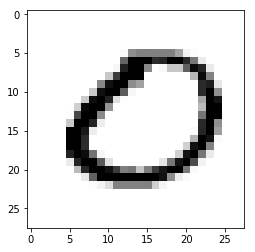

In [0]:
import matplotlib.pyplot as plt
import random

# Get one image and predict
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
    
  for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
      
    for batch in range(total_batch):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      cost_val, _ = sess.run([gpu_cost, gpu_optimizer], feed_dict = {x:batch_xs, y:batch_ys})
      avg_cost += cost_val / total_batch
      
    print("GPU\n Epoch: {:04d}\tCost: {:.9f}".format(epoch+1, avg_cost))
  print("Accuracy: ", gpu_accuracy.eval(session=sess, feed_dict={x:mnist.test.images, y:mnist.test.labels}))


  r = random.randint(0, mnist.test.num_examples - 1)
  print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
  print("Prediction: ", sess.run(tf.argmax(gpu_hypothesis, 1), feed_dict = {x:mnist.test.images[r:r+1]}))

  plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
  plt.show()